In [9]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np
from skimage.io import imread
import sys
from skimage.color import rgb2gray
from skimage.transform import resize

In [2]:
df = pd.read_pickle('Protocol.pkl') # Чтение сформированного в DCNN-DICOM.ipynb датафрейма

In [3]:
df

,Protocol,x,y,z,diameter,z_pixel,d_pixel
0,RLAD31D006-11315_RLS5A09001KDC6-K00008714,400.0,281.0,1698.3,6.0,336.0,8.152174
1,RLAD31D006-11315_RLS5A09001KDC6-K00008714,417.0,251.0,1632.7,6.0,528.0,8.152174
2,RLAD31D006-11315_RLS5A09001KDC6-K00008714,422.0,312.0,1594.3,4.0,636.0,5.434783
3,RLAD31D006-11315_RLS5A09001KDC6-K00008714,85.0,296.0,1593.5,5.0,642.0,6.793478
4,RLAD31D006-11864_RLS5A09001KDC6-N00009062,73.0,296.0,1728.7,6.0,330.0,9.188361
...,...,...,...,...,...,...,...
3152,RLADD01000268728_RLSDD01000282828,172.0,163.0,1658.9,4.4,164.0,5.104408
3153,RLADD01000268728_RLSDD01000282828,128.0,263.0,1648.5,8.0,178.0,9.280742
3154,RLADD01000268728_RLSDD01000282828,231.0,239.0,1646.9,6.0,188.0,6.960557
3155,RLADD01000268728_RLSDD01000282828,372.0,293.0,1573.3,5.0,280.0,5.800464


In [4]:
dfc = df[:-2956]

In [5]:
dfc

,Protocol,x,y,z,diameter,z_pixel,d_pixel
0,RLAD31D006-11315_RLS5A09001KDC6-K00008714,400.0,281.0,1698.3,6.0,336.0,8.152174
1,RLAD31D006-11315_RLS5A09001KDC6-K00008714,417.0,251.0,1632.7,6.0,528.0,8.152174
2,RLAD31D006-11315_RLS5A09001KDC6-K00008714,422.0,312.0,1594.3,4.0,636.0,5.434783
3,RLAD31D006-11315_RLS5A09001KDC6-K00008714,85.0,296.0,1593.5,5.0,642.0,6.793478
4,RLAD31D006-11864_RLS5A09001KDC6-N00009062,73.0,296.0,1728.7,6.0,330.0,9.188361
...,...,...,...,...,...,...,...
196,RLAD31D006-17811_RLSD31D006-17811,368.0,344.0,1660.8,6.0,384.0,8.982036
197,RLAD31D006-17811_RLSD31D006-17811,415.0,198.0,1628.0,7.0,476.0,10.479042
198,RLAD31D006-17811_RLSD31D006-17811,434.0,234.0,1625.6,7.0,486.0,10.479042
199,RLAD31D006-17811_RLSD31D006-17811,331.0,363.0,1620.8,5.0,500.0,7.485030


In [13]:
# Добавление название изображения для каждой опухоли, не обязательно
df['new_name'] = None
df['new_name'].iloc[0] = '0.png'
for i in range(1, len(df)):
    if df['Protocol'].iloc[i] == df['Protocol'].iloc[i - 1]:
        df['new_name'].iloc[i] = df['new_name'].iloc[i - 1]
    else:
        old_name = int(df['new_name'].iloc[i - 1].split('.')[0])
        df['new_name'].iloc[i] = str(old_name + 1) + '.png'

C:\Users\nonam\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
df

,Protocol,x,y,z,diameter,z_pixel,d_pixel
0,RLAD31D006-11315_RLS5A09001KDC6-K00008714,400.0,281.0,1698.3,6.0,336.0,8.152174
1,RLAD31D006-11315_RLS5A09001KDC6-K00008714,417.0,251.0,1632.7,6.0,528.0,8.152174
2,RLAD31D006-11315_RLS5A09001KDC6-K00008714,422.0,312.0,1594.3,4.0,636.0,5.434783
3,RLAD31D006-11315_RLS5A09001KDC6-K00008714,85.0,296.0,1593.5,5.0,642.0,6.793478
4,RLAD31D006-11864_RLS5A09001KDC6-N00009062,73.0,296.0,1728.7,6.0,330.0,9.188361
...,...,...,...,...,...,...,...
3152,RLADD01000268728_RLSDD01000282828,172.0,163.0,1658.9,4.4,164.0,5.104408
3153,RLADD01000268728_RLSDD01000282828,128.0,263.0,1648.5,8.0,178.0,9.280742
3154,RLADD01000268728_RLSDD01000282828,231.0,239.0,1646.9,6.0,188.0,6.960557
3155,RLADD01000268728_RLSDD01000282828,372.0,293.0,1573.3,5.0,280.0,5.800464


In [45]:
df.loc[df['new_name'] == '200.png']

,Protocol,x,y,z,diameter,z_pixel,d_pixel,new_name
1324,RLADD01000037476_RLSDD01000037403,293.0,344.0,-865.9,6.0,995.0,8.797654,200.png


In [56]:
dfc = df[:-1832]
dfc

,Protocol,x,y,z,diameter,z_pixel,d_pixel,new_name
0,RLAD31D006-11315_RLS5A09001KDC6-K00008714,400.0,281.0,1698.3,6.0,336.0,8.152174,0.png
1,RLAD31D006-11315_RLS5A09001KDC6-K00008714,417.0,251.0,1632.7,6.0,528.0,8.152174,0.png
2,RLAD31D006-11315_RLS5A09001KDC6-K00008714,422.0,312.0,1594.3,4.0,636.0,5.434783,0.png
3,RLAD31D006-11315_RLS5A09001KDC6-K00008714,85.0,296.0,1593.5,5.0,642.0,6.793478,0.png
4,RLAD31D006-11864_RLS5A09001KDC6-N00009062,73.0,296.0,1728.7,6.0,330.0,9.188361,1.png
...,...,...,...,...,...,...,...,...
1320,RLADD01000036268_RLSDD01000036188,383.0,382.0,-976.1,5.3,238.0,6.777494,198.png
1321,RLADD01000036268_RLSDD01000036188,211.0,379.0,-993.7,6.0,264.0,7.672634,198.png
1322,RLADD01000036268_RLSDD01000036188,396.0,372.0,-1011.3,18.0,279.0,23.017903,198.png
1323,RLADD01000037393_RLSDD01000037320,102.0,284.0,-1348.0,4.0,29.0,6.211180,199.png


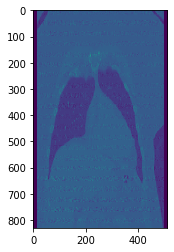

In [18]:
# Загрузка картинок в аррее
from numpy import load
# load array
image = load('data.npy', allow_pickle=True)
plt.imshow(image[7])

In [38]:
df.iloc[1]

Protocol    RLAD31D006-11315_RLS5A09001KDC6-K00008714
x                                                 417
y                                                 251
z                                              1632.7
diameter                                            6
z_pixel                                           528
d_pixel                                       8.15217
Name: 1, dtype: object

In [56]:
def TumorFinder(index):
    fig = plt.figure()

    #add axes to the image
    ax = fig.add_axes([0,0,1,1])

    # read and plot the image
    #image = plt.imread('img/0.png')
    image_p = image[index+1]
    plt.imshow(image_p, aspect='auto')

    # iterating over the image for different objects
    #for _,row in db[db.Protocol == "1.jpg"].iterrows():
    x = int(df['x'].iloc[index]) # x на фронтальном срезе
    y = int(df['y'].iloc[index]) # z на фронтальном срезе
    z = int(df['z_pixel'].iloc[index])
    d = int(df['d_pixel'].iloc[index])
    print(x, y, z, d)
    xmin = x - d / 2
    xmax = x + d / 2
    ymin = z - d / 2
    ymax = z + d / 2
    width = xmax - xmin
    height = ymax - ymin
    print(f'xmin:{xmin}, xmax:{xmax}, ymin:{ymin}, ymax:{ymax}, width:{width}, height:{height}')
    # assign different color to different classes of objects
    edgecolor = 'r'
    #ax.annotate('tumor', xy=(xmax+10,ymin+5))

    # add bounding boxes to the image
    rect = patches.Rectangle((xmin-10,ymin-10), width+20, height+20, edgecolor = edgecolor, facecolor = 'none')

    ax.add_patch(rect)
    fig.set_figwidth(20)    #  ширина и
    fig.set_figheight(20)    #  высота "Figure"

132 168 348 5
xmin:129.5, xmax:134.5, ymin:345.5, ymax:350.5, width:5.0, height:5.0


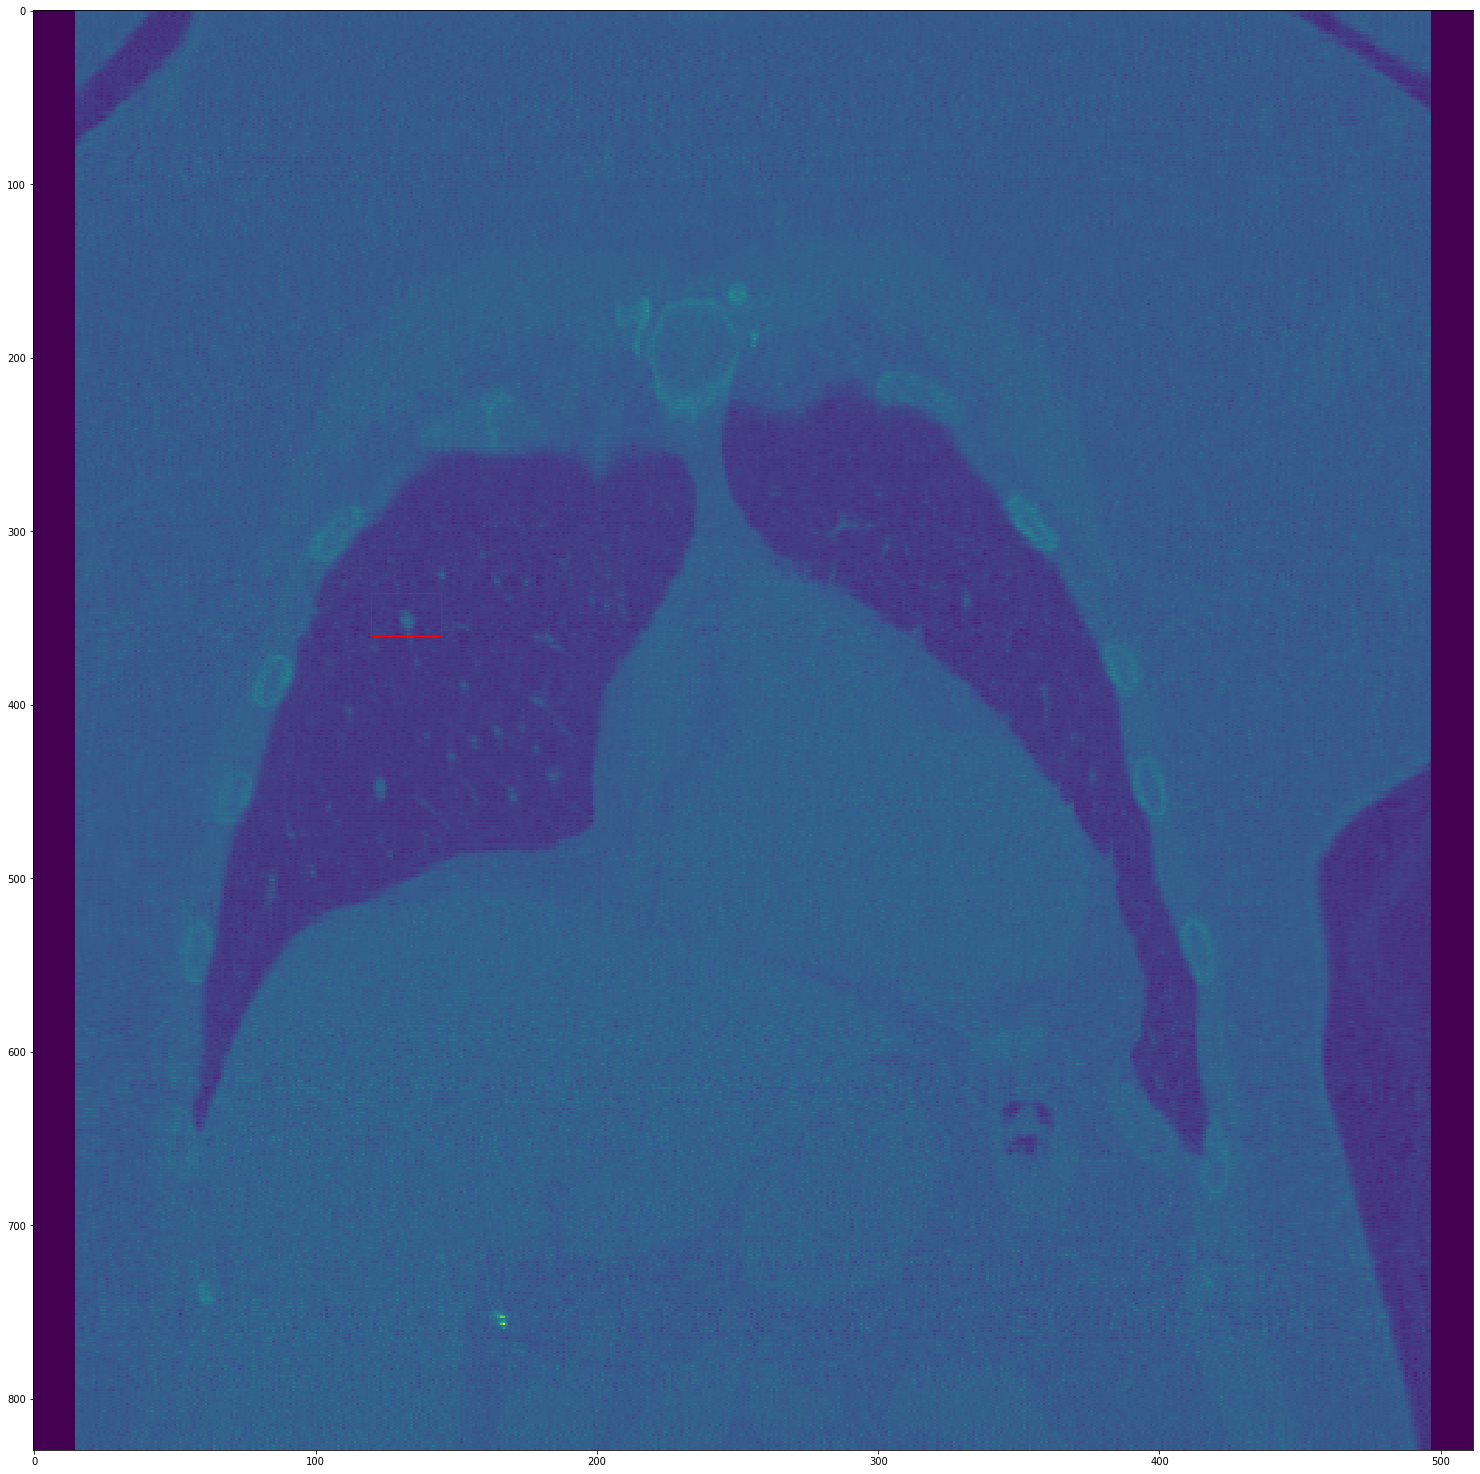

In [59]:
TumorFinder(6)

In [131]:
x_png = []
y_png = []

In [117]:
# Преобразователь в пнг
def RawToPNG(index):

    
    
    fig = plt.figure()

    #add axes to the image
    ax = fig.add_axes([0,0,1,1])

    # read and plot the image
    image_p = plt.imread('img/6.png')
    plt.imshow(image_p, aspect='auto')

    # iterating over the image for different objects
    #for _,row in db[db.Protocol == "1.jpg"].iterrows():
    x = int(df['x'].iloc[index]) # x на фронтальном срезе
    y = int(df['y'].iloc[index]) # z на фронтальном срезе
    z = int(df['z_pixel'].iloc[index])
    d = int(df['d_pixel'].iloc[index])
    size = image[index+1].shape
    size_x = size[1]
    size_y = size[0]
    print(f'size_x = {size_x}, size_y =  {size_y}')
    png_x = 432 * x / size_x
    png_y = 288 * z / size_y
    x_png.append(png_x)
    y_png.append(png_y)
    print(f'png_x = {png_x}, png_y =  {png_y}')
    print(x, y, z, d)
    xmin = png_x - d / 2
    xmax = png_x + d / 2
    ymin = png_y - d / 2
    ymax = png_y + d / 2
    width = xmax - xmin
    height = ymax - ymin
    print(f'xmin:{xmin}, xmax:{xmax}, ymin:{ymin}, ymax:{ymax}, width:{width}, height:{height}')
    # assign different color to different classes of objects
    edgecolor = 'r'
    #ax.annotate('tumor', xy=(xmax+10,ymin+5))

    # add bounding boxes to the image
    rect = patches.Rectangle((xmin-5,ymin-5), width+10, height+10, edgecolor = edgecolor, facecolor = 'none')

    ax.add_patch(rect)
    fig.set_figwidth(20)    #  ширина и
    fig.set_figheight(20)    #  высота "Figure"

In [141]:
# Генератор пнг, не уверен что он тут нужен
def png_gen(index):
    x = int(df['x'].iloc[index]) # x на фронтальном срезе
    y = int(df['y'].iloc[index]) # z на фронтальном срезе
    z = int(df['z_pixel'].iloc[index])
    d = int(df['d_pixel'].iloc[index])
    size = image[index+1].shape
    size_x = size[1]
    size_y = size[0]
    #print(f'size_x = {size_x}, size_y =  {size_y}')
    png_x = 432 * x / size_x
    png_y = 288 * z / size_y
    #print(f'png_x = {png_x}, png_y =  {png_y}')
    x_png.append(png_x)
    y_png.append(png_y)
    xmin = png_x - d / 2
    xmax = png_x + d / 2
    ymin = png_y - d / 2
    ymax = png_y + d / 2
    width = xmax - xmin
    height = ymax - ymin
    print(f'img\\{i}.png,{int(xmin)},{int(ymin)},{int(xmax)},{int(ymax)},tumor')

In [142]:
# Формирование аттачмента для f-rcnn, библиотека - https://github.com/kbardool/keras-frcnn.git
# python train_frcnn.py -o simple -p annotate.txt
# Падает по ядру процессора, попробовать запустить на станции
for i in range(1,11):
    png_gen(i)

img\1.png,347,139,355,147,tumor
img\2.png,353,169,358,174,tumor
img\3.png,68,171,74,177,tumor
img\4.png,57,114,66,123,tumor
img\5.png,100,156,106,162,tumor
img\6.png,108,118,113,123,tumor
img\7.png,105,121,110,126,tumor
img\8.png,339,148,344,153,tumor
img\9.png,349,195,354,200,tumor
img\10.png,155,22,161,28,tumor


size_x = 512, size_y =  830
png_x = 111.375, png_y =  120.75180722891567
132 168 348 5
xmin:108.875, xmax:113.875, ymin:118.25180722891567, ymax:123.25180722891567, width:5.0, height:5.0


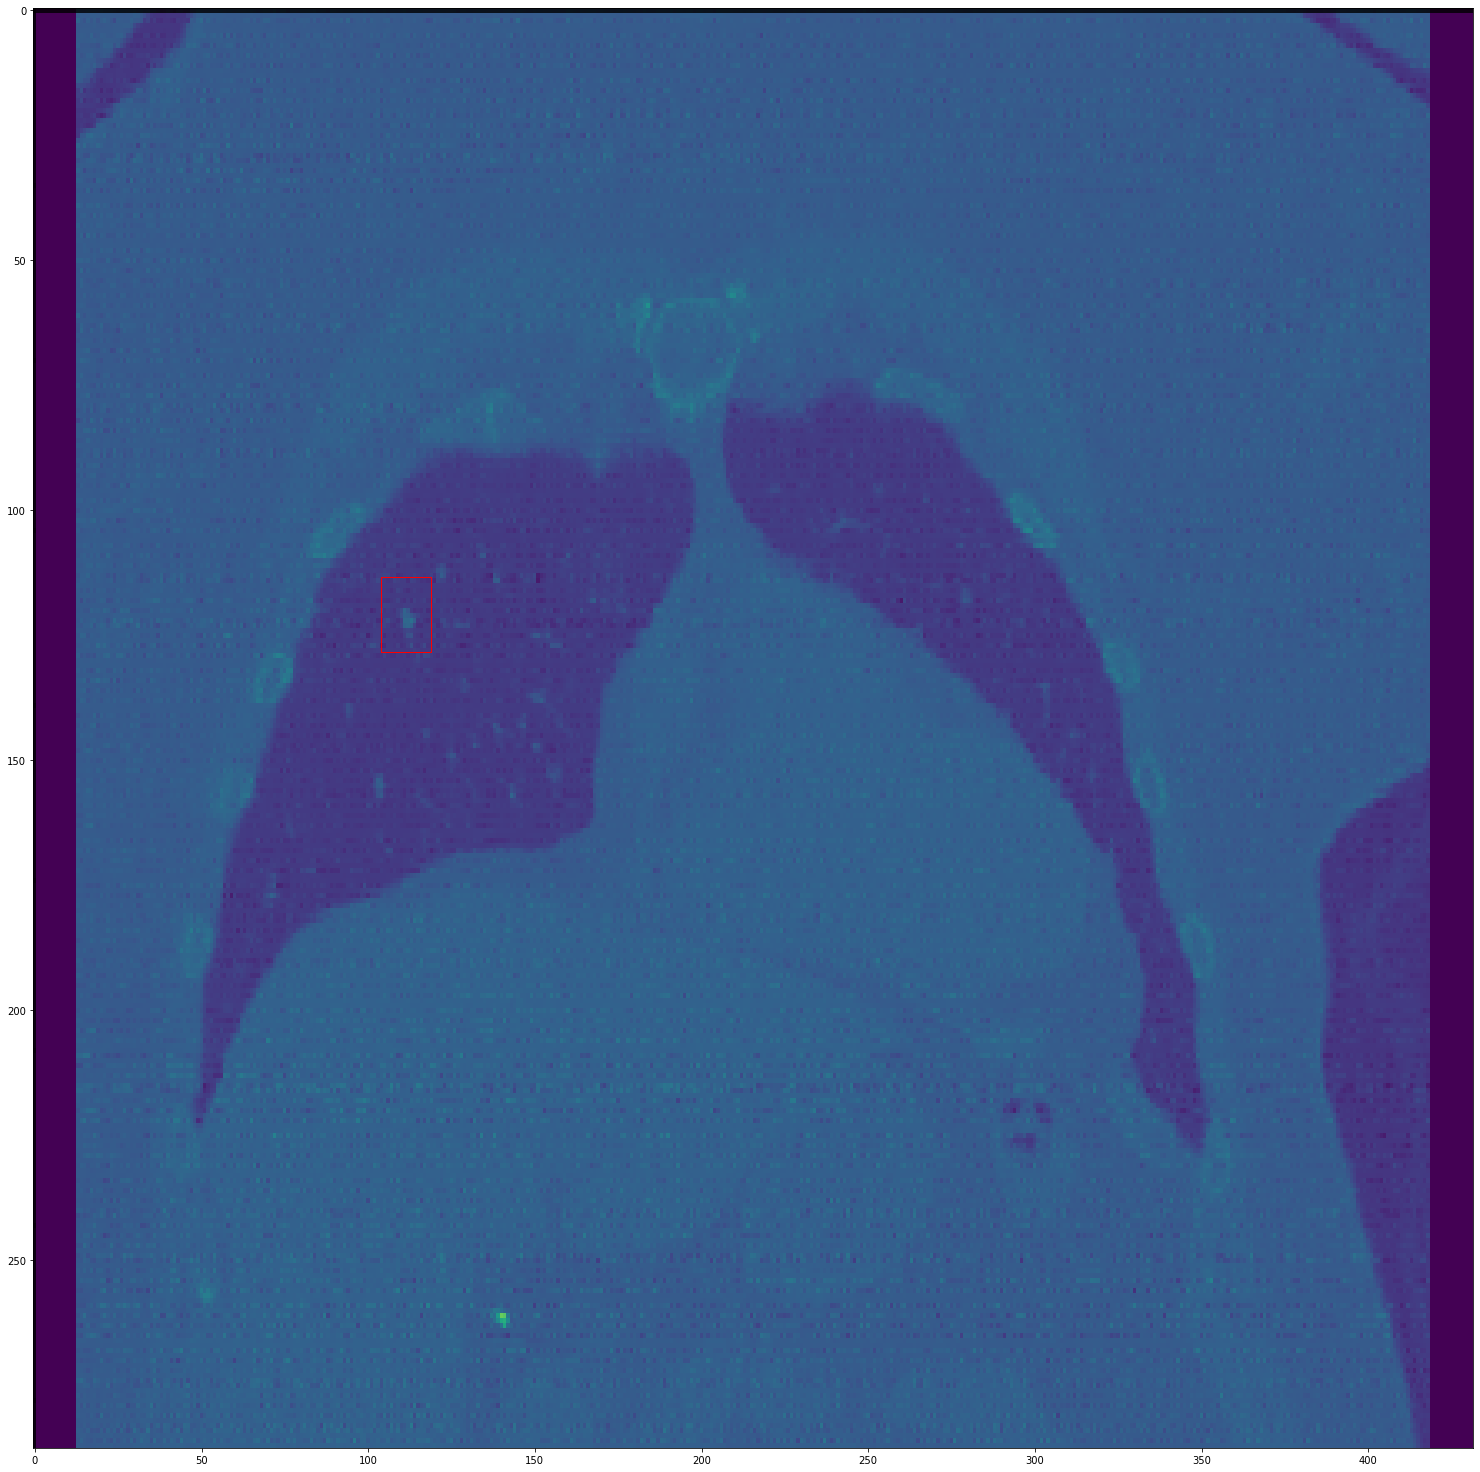

In [109]:
RawToPNG(6)

# Подготовка параметров для модели

In [32]:
# Функция изменения размера и обрезки изображения
g = 1
def get_image(g, folder):
    Full_filename = str(p) + str(i) + '.png'
    im = imread(Full_filename)
    grayscale = rgb2gray(im).astype(np.float32)
    #grayscale_cut = grayscale[Top:Top+Height, Left:Left+Width]
    #grayscale_resize = resize(grayscale_cut,(64,32))
    return grayscale

In [33]:
get_image(n, p)

array([[0.00334824, 0.01564   , 0.01564   , ..., 0.01564   , 0.01564   ,
        0.01564   ],
       [0.01564   , 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275],
       [0.01564   , 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275],
       ...,
       [0.01564   , 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275],
       [0.01564   , 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275],
       [0.01564   , 0.08322275, 0.08322275, ..., 0.08322275, 0.08322275,
        0.08322275]], dtype=float32)

In [61]:
# One hot encoding и формирование массива
pnt = str('C:\\Users\\nonam\\Jupyter\\DICOM\\img_notumor\\')
pt = str('C:\\Users\\nonam\\Jupyter\\DICOM\\img_tumor\\')
nti = []
label = []
for i in range(0, 11):
    nti.append(get_image(i, pnt))
    label.append([1,0])
    nti.append(get_image(i, pt))
    label.append([0,1])

In [10]:
# Функция вывода изображения для демонстрации

def img_print(im):
    fig, ax = plt.subplots()

    ax.imshow(im, cmap=plt.cm.gray)

    fig.set_figwidth(10)    #  ширина и
    fig.set_figheight(10)    #  высота "Figure"
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.show()

def alt_print(im):
    fig, axes = plt.subplots()
    #ax = axes.ravel()

    ax[0].imshow(im)
    ax[0].set_title("Result")
    #ax[1].imshow(grayscale, cmap=plt.cm.gray)
    #ax[1].set_title("Grayscale")

    fig.tight_layout()
    plt.show()

In [63]:
# формирование датасета с лейблами
X_train = []
Y_train = []
X_test = []
Y_test = []

def X_Y_formator(data, folder, X, Y):
    for i in range(len(data)):
        try:
            X.append(get_image(data['FileName'].iloc[i], folder, data['Top'].iloc[i], data['Left'].iloc[i], data['Height'].iloc[i], data['Width'].iloc[i]))
            Y.append(data['DigitLabel'].iloc[i])
        except Exception as e:
            print(f'Eroor: {e}')
            print(f"In file: {data['FileName'].iloc[i]}, folder: {folder}, Top: {data['Top'].iloc[i]}, Left: {data['Left'].iloc[i]}, Height: {data['Height'].iloc[i]}, Width: {data['Width'].iloc[i]}")


# Структура сверточной нейросети 

In [ ]:
nti, label

In [64]:
X_train = np.array(nti)
Y_train = np.array(label)

In [65]:
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')

In [66]:
X_train = X_train.reshape(-1, 288, 432, 1) # Решейпим до формата, который подходит модели

In [67]:
X_train.shape

(22, 288, 432, 1)

In [68]:
# Разделение выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(X_train, Y_train, test_size=0.2, random_state=101)

In [69]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((17, 288, 432, 1), (5, 288, 432, 1), (17, 2), (5, 2))

In [70]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [80]:
# Базовые параметры
batch_size = 64
epochs = 6
num_classes = 2 # Классы опухоль есть/нет, см. генератор выше

In [81]:
# Задание слоёв
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(288,432,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(Dense(num_classes, activation='softmax'))

In [82]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 288, 432, 32)      320       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 288, 432, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 144, 216, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 144, 216, 64)      18496     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 144, 216, 64)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 72, 108, 64)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 108, 128)      73856     
__________

In [84]:
train_model = model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Instructions for updating:
Use tf.cast instead.
Train on 17 samples, validate on 5 samples
Epoch 1/6
17/17 [==============================] - 21s - loss: 0.6898 - acc: 0.5294 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 2/6
17/17 [==============================] - 13s - loss: 7.5850 - acc: 0.5294 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 3/6
17/17 [==============================] - 11s - loss: 7.5850 - acc: 0.5294 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 4/6
17/17 [==============================] - 10s - loss: 7.5850 - acc: 0.5294 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 5/6
17/17 [==============================] - 10s - loss: 7.5850 - acc: 0.5294 - val_loss: 9.6709 - val_acc: 0.4000
Epoch 6/6
17/17 [==============================] - 10s - loss: 7.5850 - acc: 0.5294 - val_loss: 9.6709 - val_acc: 0.4000


In [109]:
train_arr = []
for i in train_label:
    train_arr.append(i[1])
    
pred_arr = []
for i in y_pred:
    pred_arr.append(i[1])

In [ ]:
y_pred = model.predict(train_X)
y_pred

In [110]:
# Матрица корреляции
from sklearn.metrics import confusion_matrix
# y_true = [2, 0, 2, 2, 0, 1]
# y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(train_arr, pred_arr)

array([[0, 8],
       [0, 9]], dtype=int64)

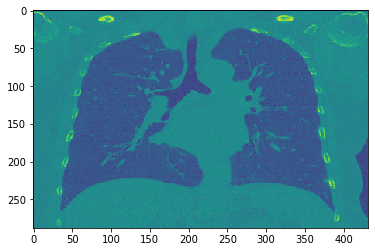

In [89]:
# Ручное предсказание
im = imread("C:/Users/nonam/Jupyter/DICOM/img_tumor/12.png")
np.array(im).shape
grayscale = rgb2gray(im).astype(np.float32)
plt.imshow(grayscale, aspect='auto')
grayscale = grayscale.reshape(-1, 288, 432, 1)
fm = model.predict(grayscale)

In [91]:
np.argmax(fm)

1